In [1]:
# 28_Dangare Akash
# assignment 3

import pandas as pd
import numpy as np
import numpy.random as rd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Mall_Customers.csv", index_col=0)
df = pd.DataFrame(df)
print(df)

             Genre  Age  Annual Income (k$)  Spending Score (1-100)
CustomerID                                                         
1             Male   19                  15                      39
2             Male   21                  15                      81
3           Female   20                  16                       6
4           Female   23                  16                      77
5           Female   31                  17                      40
...            ...  ...                 ...                     ...
196         Female   35                 120                      79
197         Female   45                 126                      28
198           Male   32                 126                      74
199           Male   32                 137                      18
200           Male   30                 137                      83

[200 rows x 4 columns]


In [3]:
df.isna().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df["Genre"].replace({"Male" : 1,"Female" : 0}, inplace=True)

In [5]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40
...,...,...,...,...
196,0,35,120,79
197,0,45,126,28
198,1,32,126,74


In [6]:
df_1 = df[["Annual Income (k$)", "Spending Score (1-100)"]]
df_1

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

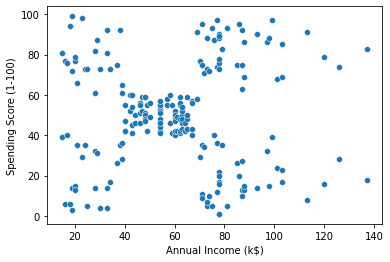

In [7]:
sns.scatterplot(data=df_1, x="Annual Income (k$)", y="Spending Score (1-100)")

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0, init="k-means++").fit(df_1)
colors=kmeans.labels_

In [9]:
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[87.        , 18.63157895],
       [44.15447154, 49.82926829],
       [86.53846154, 82.12820513]])

In [10]:
a = [itm[0] for itm in cluster_centers]
b = [itm[1] for itm in cluster_centers]

C:\Users\Akash Dangare\AppData\Local\Temp\ipykernel_16832\573457850.py:2: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(data=df_1, x="Annual Income (k$)", y="Spending Score (1-100)",palette=l, hue=colors)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

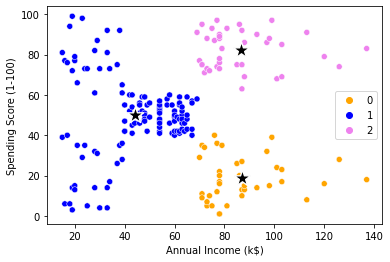

In [11]:

l = ['orange','blue','violet','yellow','green']
sns.scatterplot(data=df_1, x="Annual Income (k$)", y="Spending Score (1-100)",palette=l, hue=colors)
sns.scatterplot(x=a, y=b,c='black', marker='*' ,s=300)

In [12]:
elbow = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state = 0, init="k-means++").fit(df_1)
    elbow.append(kmeans.inertia_)
print(elbow)

[269981.28, 181363.595959596, 106348.37306211119, 73679.78903948837, 44448.45544793371, 37265.86520484347, 30259.65720728547, 25095.703209997548, 21830.041978049434, 20736.679938924124]


[Text(0.5, 0, 'Clusters'), Text(0, 0.5, 'elbow')]

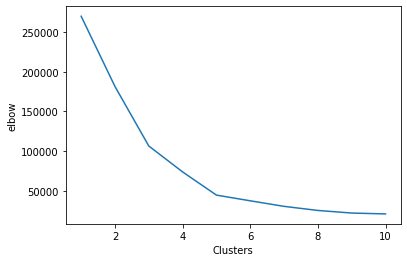

In [17]:
sns.lineplot(x=[i for i in range(1, 11)], y=elbow).set(xlabel="Clusters", ylabel="elbow")

In [18]:
kmeans = KMeans(n_clusters=5, random_state=0, init="k-means++").fit(df_1)
colors=kmeans.labels_

cluster_centers_1 = kmeans.cluster_centers_
cluster_centers_1

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [19]:
a_1 = [itm[0] for itm in cluster_centers_1]
b_1 = [itm[1] for itm in cluster_centers_1]

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

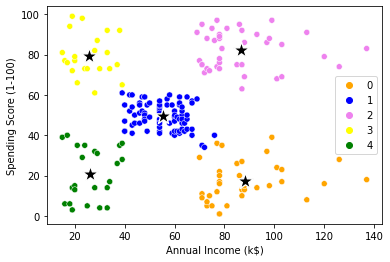

In [20]:
sns.scatterplot(data=df_1, x="Annual Income (k$)", y="Spending Score (1-100)",palette=l, hue=colors)
sns.scatterplot(x=a_1, y=b_1, marker='*' ,c='black',s=300)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [20.0, 20.0, 40.0, 40.0],
  [5.0, 5.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [90.0, 90.0, 112.5, 112.5],
  [75.0, 75.0, 101.25, 101.25],
  [60.0, 60.0, 88.125, 88.125],
  [17.5, 17.5, 74.0625, 74.0625],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [165.0, 165.0, 175.0, 175.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [170.0, 170.0, 192.5, 192.5],
  [142.5, 142.5, 181.25, 181.25],
  [45.78125, 45.78125, 161.875, 161.875],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [222.5, 222.5, 252.5, 252.5],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [282.5, 282.5, 312.5, 312.5],
  [237.5, 237.5, 297.5, 297.5],
  [335.0, 33

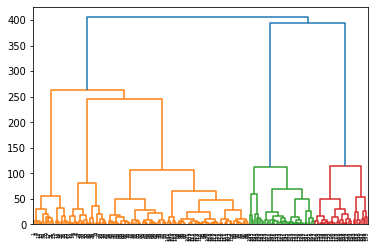

In [21]:
import scipy.cluster.hierarchy as sch
sch.dendrogram(sch.linkage(df_1, method='ward'))

In [22]:
# using agglomerative clustering

from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=5).fit(df_1)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

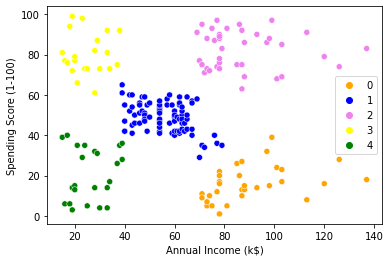

In [26]:
sns.scatterplot(data=df_1, x="Annual Income (k$)", y="Spending Score (1-100)",palette=l, hue=clustering.labels_)